In [84]:
%matplotlib widget
import numpy as np
from plantcv import plantcv as pcv
from matplotlib import pyplot as plt

In [85]:
pcv.params.debug = "plot"
pcv.params.text_size = 5
pcv.params.text_thickness = 10
pcv.params.line_thickness = 10

In [86]:
def plot_color_channels(img):
    # List of colormaps
    colors = ["Blues", "Greens", "Reds"]
    # Create a new figure with 3 subplots
    figure, plots = plt.subplots(ncols=3, nrows=1, constrained_layout=True)
    # iterate over each subplot
    for i, subplot in zip(range(3), plots):
        # Plot the ith image color channel with the ith colormap
        subplot.imshow(img[:, :, i], cmap=colors[i])
        # Turn off the coordinates
        subplot.set_axis_off()
    # Show the image
    plt.show()

## Help:
- PlantCV - https://plantcv.readthedocs.io/en/stable/
- NumPy - https://numpy.org/doc/stable/

# What is an image?
We will open an image and explore the components of it.

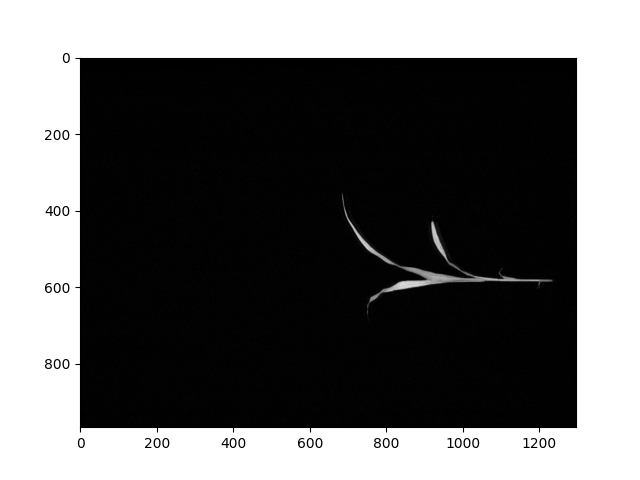

In [87]:
# Read in the image fmax.png
gray_img, gray_path, gray_name = pcv.readimage("./images/fmax.png")

In [88]:
# Show what is in the second and third outputs from pcv.readimage
print (gray_path)
print(gray_name)

./images
fmax.png


# What are some things we notice about the image?

* The image is composed of small square elements, or pixels
* The pixel coordinate system origin is in the top left
* The coordinate system is left-handed, coordinate values increase down and right
* The image is composed of gray values (no color)

![2D gird](./figures/grid2D.png)

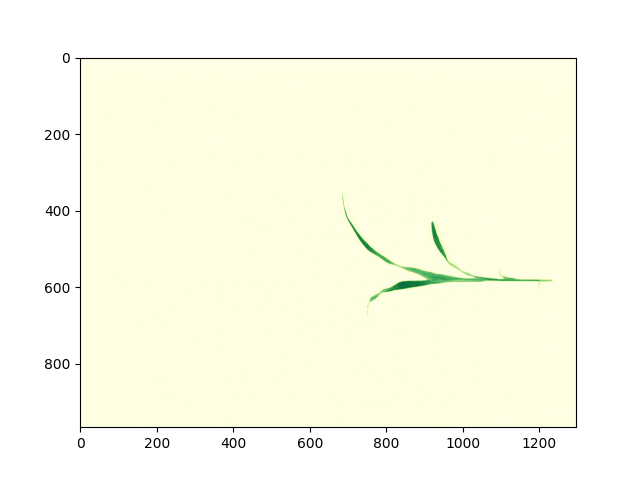

In [89]:
# Plot the image using a different colormap, some options: 'YlGn', 'viridis', 'magma', 'Oranges', 'RdPu'
pcv.plot_image(gray_img,cmap="YlGn")

# How are images represented in Python?

In [90]:
# Use the Python type function to determine the data type of the image
type(gray_img)

numpy.ndarray

# Most common Python image analysis packages store images as NumPy arrays
[NumPy](https://numpy.org/) is a core package of the scientific Python community.

We can use NumPy to determine the shape and size of the image. The dimensions are in the order y (rows), x (columns), z (channels) for images.

We can also determine what type of data is stored in each pixel (dtype).

In [91]:
# Print the image data
print(gray_img)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0 240   0 ...   0   0   0]
 [  0  90   0 ... 111   0   0]
 [  0  22 134 ... 284   0 136]]


In [92]:
# Determine the shape and size of the image
gray_img.shape

(966, 1296)

In [93]:
# Determine the data type of the image
gray_img.dtype

dtype('uint16')

# Common image data types

The data type tells how the pixel values are encoded and how many bits they require. 

It is usefull because it determines the range of values a pixel can take. 

Unsigned integers (uint) are commonly used:
- uint8 = 8-bit (2^8 = 256 possible values. Darkest value = 0, brightest = 255)
- uint16 = 16-bit (2^16 = 65,536 possible values. Darkest value = 0, brightest = 65,535)

In [94]:
# Calculate the minimum value observed in gray_img
np.min(gray_img)

0

In [95]:
# Calculate the maximum value observed in gray_img
np.max(gray_img)

7084

# Indexing and slicing
Help us to select portions of an array.


In [96]:
# Show the value of the pixel in row 580 and column 940 
gray_img[580,940]

3935

The basic slice syntax is _i:j_ where _i_ is the starting index and _j_ is the stopping index

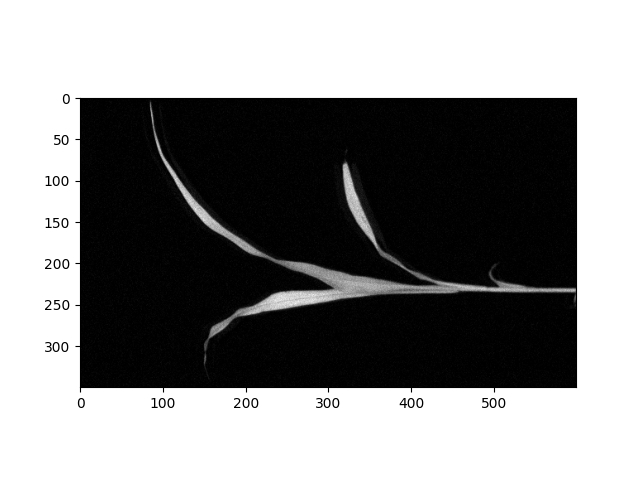

In [97]:
# Create a new image by cropping around the plant part and display it
gray_img_crop = gray_img[350:700,600:1200]
pcv.plot_image(gray_img_crop)

* If _i_ is not given it defaults to 0. 
* If _j_ is not given it defaults to the last value.
* : means select all indices along this axis.

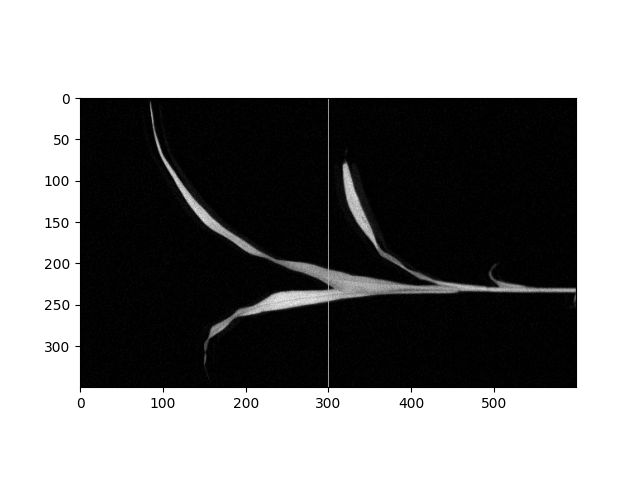

In [98]:
# Change the pixels in a full column of the cropped image to an arbitrary value
gray_img_crop[:,300] = 5000
pcv.plot_image(gray_img_crop)

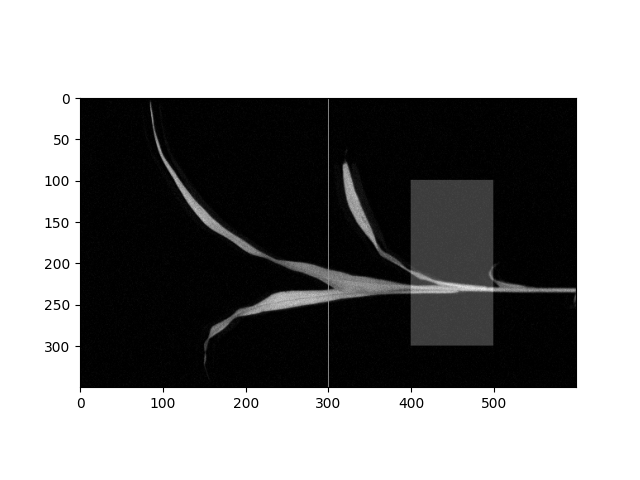

In [99]:
# Add a constant value to a part of the image
gray_img_crop[100:300,400:500] = gray_img_crop[100:300,400:500] + 2000
pcv.plot_image(gray_img_crop)

# RGB images
This is a color image encoded using a Red Green Blue (RGB) color model.
Note that in OpenCV the color order is BGR.

![3D gird](./figures/grid3D.png)

The color channels are stacked in a third dimension and increase from the 'front' to the 'back'

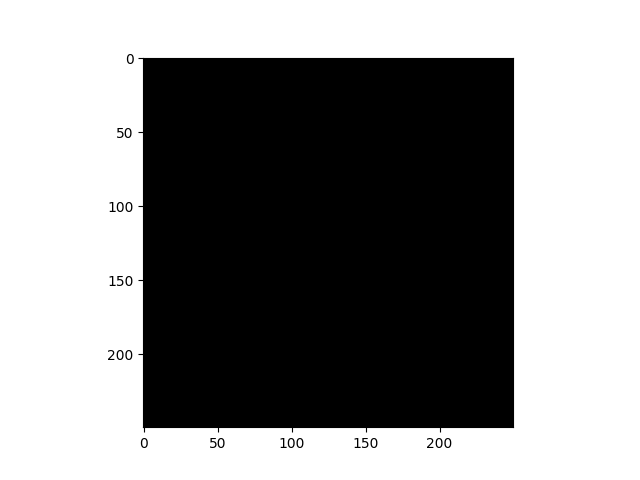

In [100]:
# Create a constant color image:
# Initialization with all values to zero
my_rgb_img = np.zeros((250,250,3), dtype=np.uint8)
pcv.plot_image(my_rgb_img)

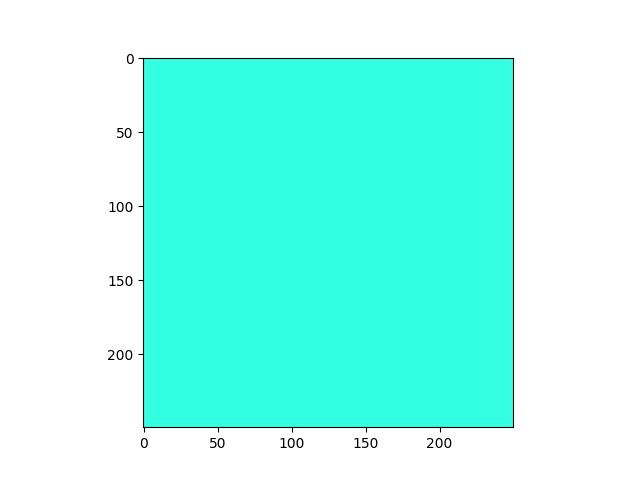

In [101]:
# Create a color image:
# Give a value to each color channel

#https://htmlcolorcodes.com/color-picker/

#B
my_rgb_img[:,:,0] = 227

#G
my_rgb_img[:,:,1] = 255

#R
my_rgb_img[:,:,2] = 51
pcv.plot_image(my_rgb_img)


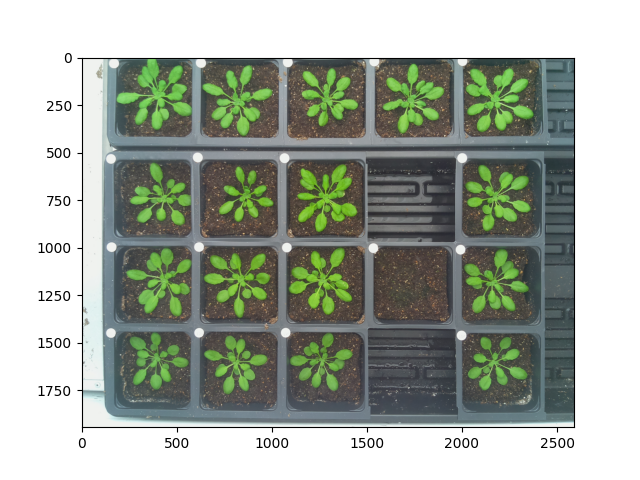

In [102]:
# Read a color image into the program
rgb_img, filepath, filename = pcv.readimage(filename="images/2017-02-28_1500_ch129-pos01.jpg")

In [103]:
# Determine the shape and size of the image
rgb_img.shape

(1944, 2592, 3)

In [104]:
# Determine the data type of the image
rgb_img.dtype

dtype('uint8')

In [105]:
# Calculate the minimum value observed in rgb_img
np.min(rgb_img)

0

In [106]:
# Calculate the maximum value observed in rgb_img
np.max(rgb_img)

255

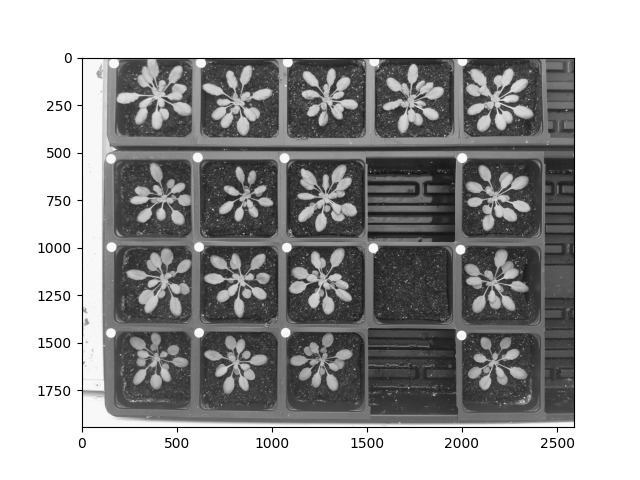

In [107]:
# Subset the green color channel
pcv.plot_image(rgb_img[:,:,1])

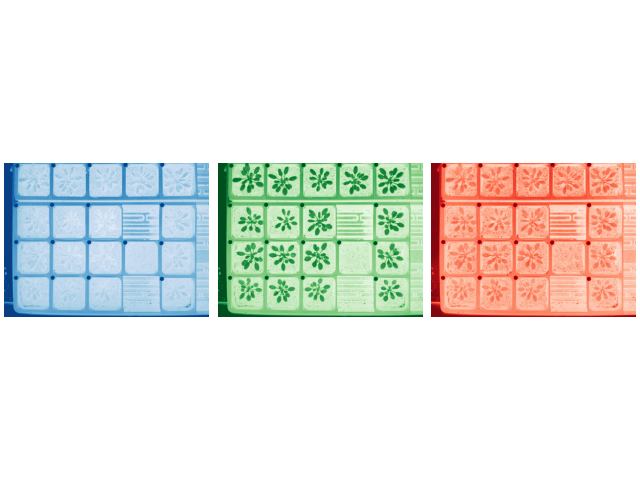

In [108]:
# Plot all three color channels
plot_color_channels(rgb_img)

In [109]:
# Calculate the min, max, and mean values in the green color channel
print(np.min(rgb_img[:,:,1]))
print(np.max(rgb_img[:,:,1]))
print(np.mean(rgb_img[:,:,1]))

23
249
115.06812827058883


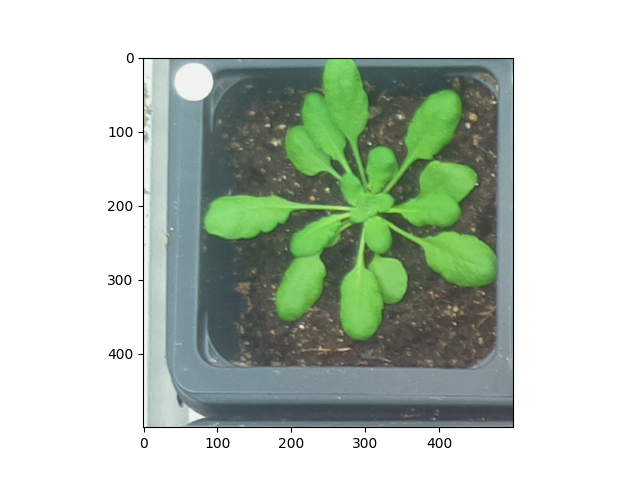

In [110]:
# crop the rgb_img to obtain a single plant
rgb_crop=rgb_img[0:500,100:600]
pcv.plot_image(rgb_crop)

In [111]:
# Print dimensions of subset image
rgb_crop.shape

(500, 500, 3)

# Other color spaces
Images can be represented in other color spaces or conventions. They also consist of different channels that can be observed as grayscale 

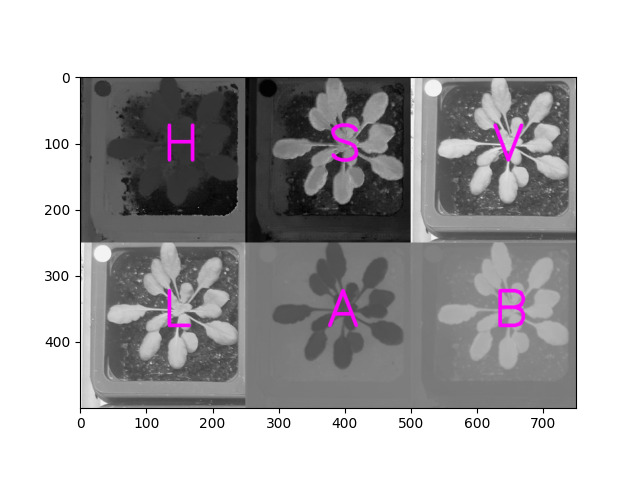

In [112]:
# Visualize colorspaces
rgb_vis=pcv.visualize.colorspaces(rgb_crop, original_img=False)

# Conversion from RGB to grayscale

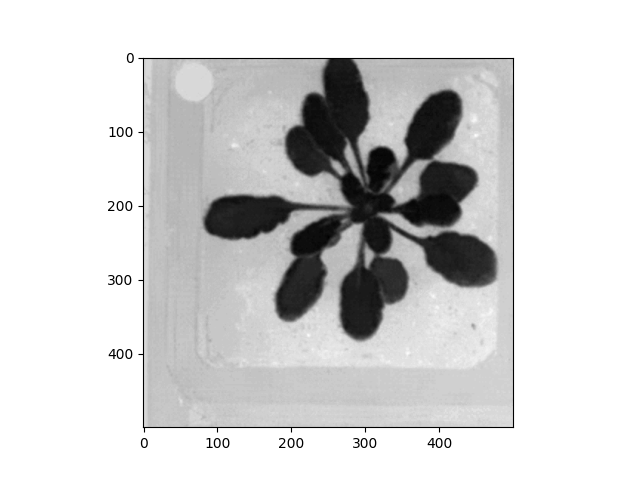

In [113]:
# Convert RGB image to a channel in the lab space 
a_channel=pcv.rgb2gray_lab(rgb_crop,'a')

# How do we label which pixels are plant (or background)?

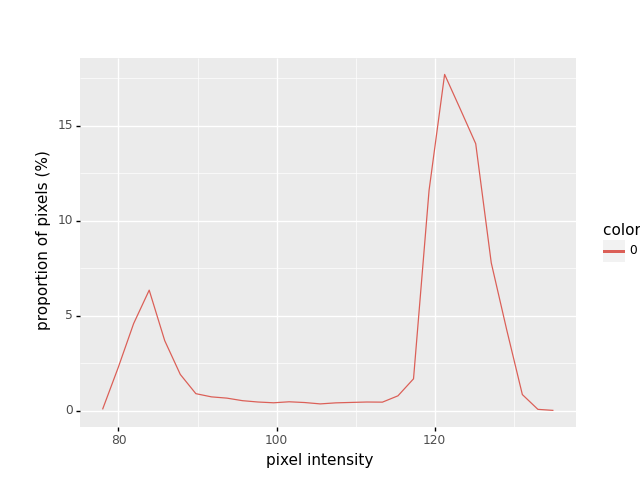

In [114]:
# Plot a histogram of the pixel intensity values
hist = pcv.visualize.histogram(img=a_channel, bins = 30)

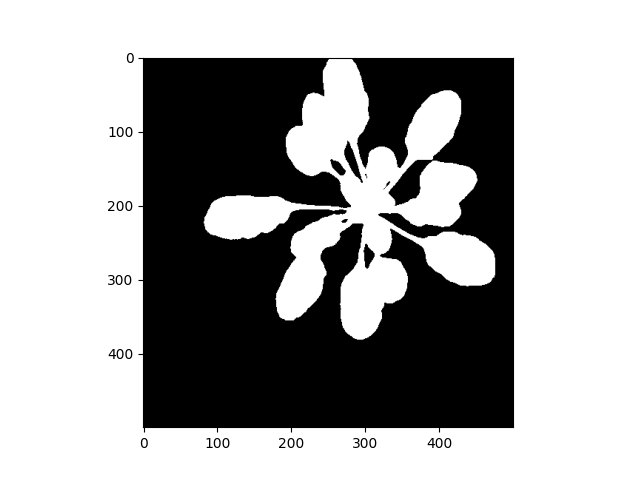

In [115]:
# Threshold the grayscale image
bin_img = pcv.threshold.binary(gray_img=a_channel, threshold=100, max_value=255, object_type="dark")

In [116]:
# Show the values of the mask
bin_img.shape

(500, 500)

In [117]:
# Use the True/False result to mask the backround 
bin_area=bin_img/255

In [118]:
# Calculate the area of the plant in pixels
np.sum(bin_area)

56106.0

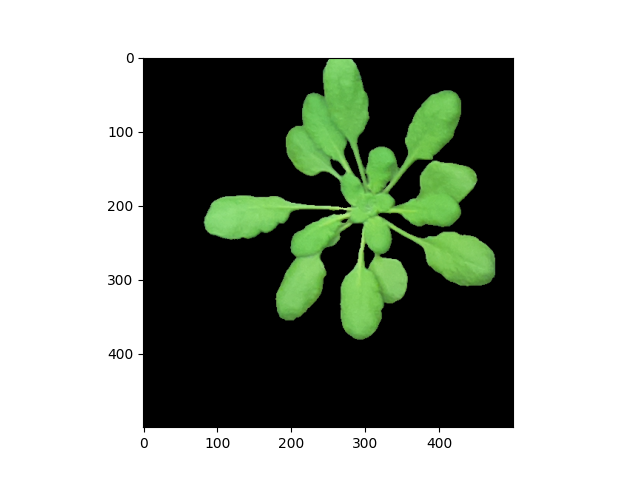

In [119]:
# masking using pcv.apply_mask
image_masked2 = pcv.apply_mask(img=rgb_crop, mask=bin_img, mask_color='black')